In [8]:
import pandas as pd
import numpy as np
from lstm_attention.src import utils
import matplotlib.pyplot as plt

# What is in the dataset?

In [9]:
tryp_dataframe = pd.read_csv(r"C:\Users\elabo\Documents\MannPeptideResults\CalibratorTestingMultipleFilesSmallFiltered.csv")
tryp_dataframe = tryp_dataframe[["FullSequence", "Mean"]]
tryp_dataframe

,FullSequence,Mean
0,GGGGGGGGGGGLGGGLGNVLGGLISGAGGGGGGGGGGGGGGGGGGG...,163.495894
1,GGGGGGGGGGGLGGGLGNVLGGLISGAGGGGGGGGGGGGGGGGGGG...,155.979019
2,GGSGGSHGGGSGFGGESGGSYGGGEEASGSGGGYGGGSGK,43.716040
3,ALANVNIGSLIC[Common Fixed:Carbamidomethyl on C...,159.260779
4,GSYGSGGSSYGSGGGSYGSGGGGGGHGSYGSGSSSGGYR,43.028359
...,...,...
211051,MDKLEAEK,24.208600
211052,GAAGIAGPK,64.409610
211053,PSAPVFDR,45.212570
211054,LGQVSVK,28.377980


In [20]:
#Histogram of the distribution of peptide Mods in the dataset
#Common biological modifications
common_biological_mods = tryp_dataframe[["FullSequence", "Mean"]].where(
    tryp_dataframe["FullSequence"].str.contains("Common Biological")).dropna()

#common Fixed modifications
common_fixed_mods = tryp_dataframe[["FullSequence", "Mean"]].where(
    tryp_dataframe["FullSequence"].str.contains("Common Fixed")).dropna()

#Common artifact modifications
common_artifact_mods = tryp_dataframe[["FullSequence", "Mean"]].where(
    tryp_dataframe["FullSequence"].str.contains("Common Artifact")).dropna()

#Common variable modifications
common_variable_mods = tryp_dataframe[["FullSequence", "Mean"]].where(
    tryp_dataframe["FullSequence"].str.contains("Common Variable")).dropna()

#UniProt modifications
uniprot_mods = tryp_dataframe[["FullSequence", "Mean"]].where(
    tryp_dataframe["FullSequence"].str.contains("UniProt")).dropna()

#non modified peptides
non_modified = tryp_dataframe[["FullSequence", "Mean"]].where(
    tryp_dataframe["FullSequence"].str.contains(":") == False).dropna()

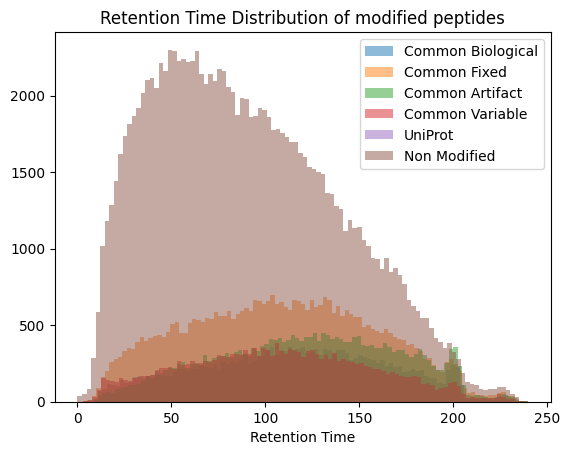

In [23]:
#histogram of all mods dataframes
mods = [common_biological_mods, common_fixed_mods, common_artifact_mods, common_variable_mods, uniprot_mods, non_modified]
mods_names = ["Common Biological", "Common Fixed", "Common Artifact", "Common Variable", "UniProt", "Non Modified"]
fig, ax = plt.subplots()
for i in range(len(mods)):
    ax.hist(mods[i]["Mean"], bins=100, alpha=0.5, label=mods_names[i])
ax.legend()
ax.set_xlabel("Retention Time")
#add title
plt.title("Retention Time Distribution of modified peptides")
plt.show()

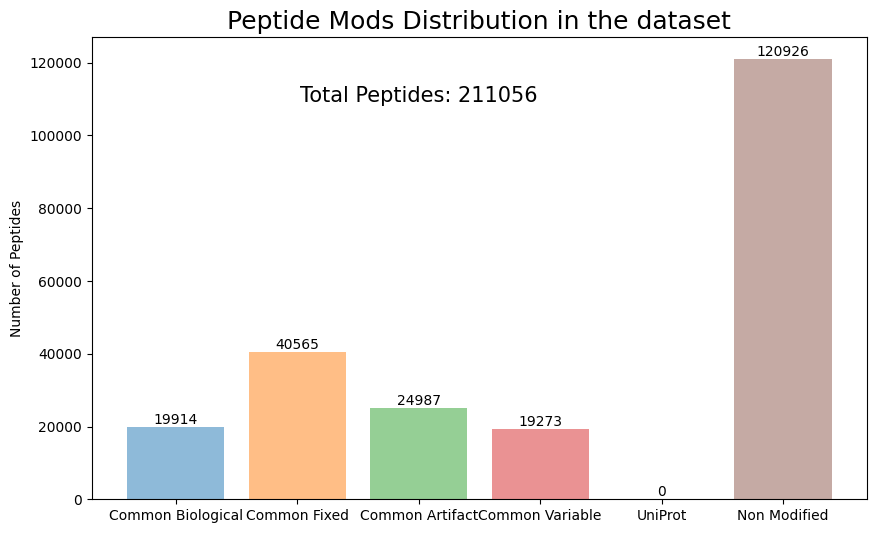

In [38]:
#Histogram of the distribution of peptide Mods in the dataset
mods = [common_biological_mods, common_fixed_mods, common_artifact_mods, common_variable_mods, uniprot_mods, non_modified]
mods_names = ["Common Biological", "Common Fixed", "Common Artifact", "Common Variable", "UniProt", "Non Modified"]

for i in range(len(mods)):
    plt.bar(i, len(mods[i]["Mean"].to_list()), alpha=0.5)

plt.xticks(range(len(mods)), mods_names)
#increase plot size
fig = plt.gcf()
fig.set_size_inches(10, 6)
#add title
plt.title("Peptide Mods Distribution in the dataset", fontsize=18)
#add y label
plt.ylabel("Number of Peptides")
#add text with the number of peptides in each category
for i in range(len(mods)):
    plt.text(i, len(mods[i]["Mean"].to_list()), len(mods[i]["Mean"].to_list()), ha='center', va='bottom')
#text of total peptides. Located at the top of the plot with letter size 20
plt.text(2, 108000, "Total Peptides: " + str(len(tryp_dataframe)), ha='center', va='bottom', fontsize=15)    
plt.show()